# 3. Sampling and estimation

__Sample selection__

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from matplotlib import pyplot as plt

%matplotlib inline

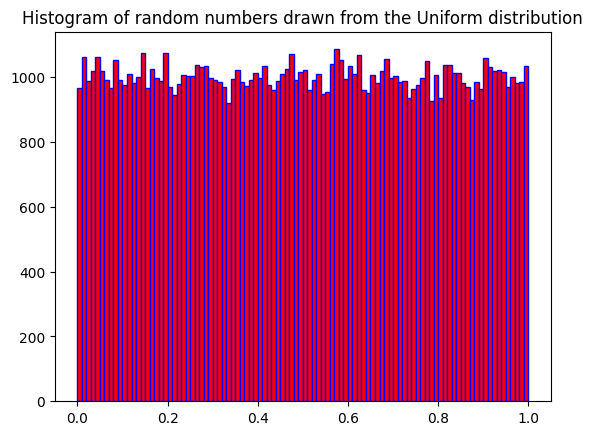

In [3]:
N = 100000
val = np.random.random(N)
plt.hist(val, 100, color="r", edgecolor="b")
plt.title("Histogram of random numbers drawn from the Uniform distribution")
plt.show()

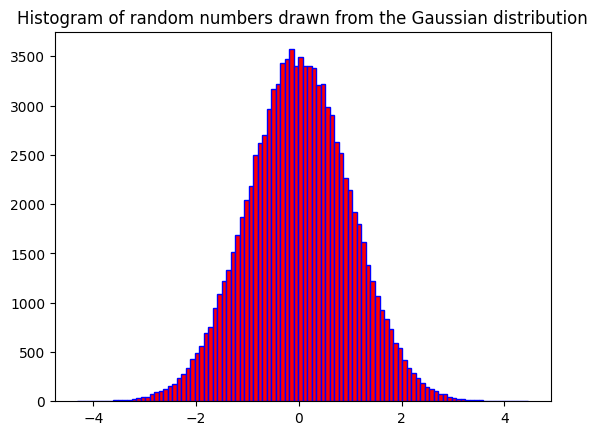

In [4]:
val2 = np.random.randn(N)
plt.hist(val2, 100, color="r", edgecolor="b")
plt.title("Histogram of random numbers drawn from the Gaussian distribution")
plt.show()

__The central limit theorem__

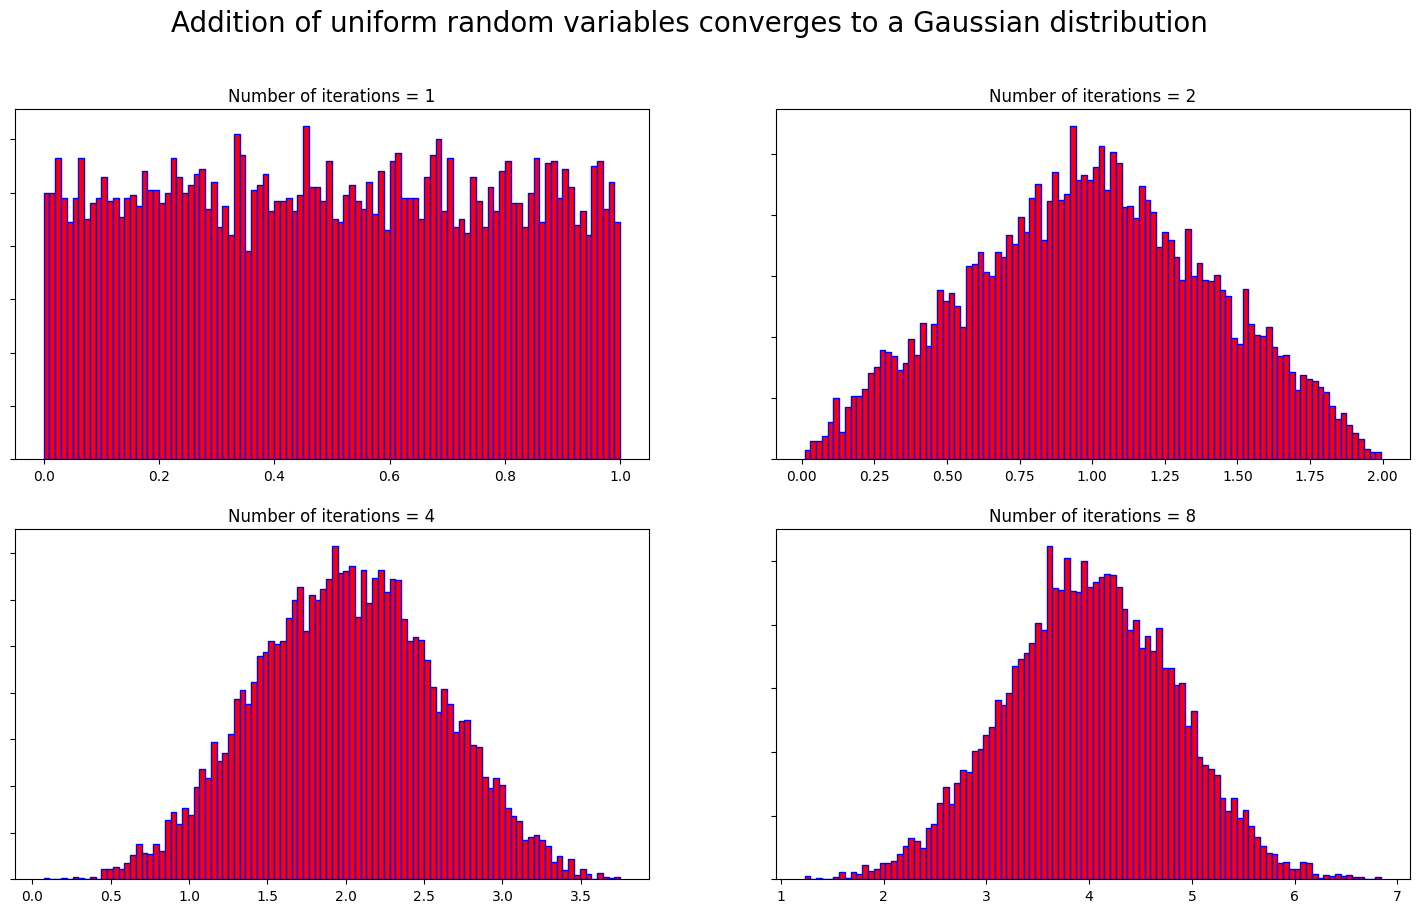

In [5]:
# define the number of random variables
N = 10000

# define the number of iterations
it = [1, 2, 4, 8]

f = plt.figure(figsize=(18, 10))
for i in range(4):
    # define an array of zeros which will holds the sums
    x = np.zeros((N))
    subplot = f.add_subplot(2, 2, i + 1)
    for j in range(N):
        for k in range(it[i]):
            x[j] = x[j] + np.random.random()
    plt.hist(x, 100, density=True, color="r", edgecolor="b")
    plt.title("Number of iterations = " + str(it[i]))
    plt.setp(subplot.get_yticklabels(), visible=False)

plt.suptitle(
    "Addition of uniform random variables converges to a Gaussian distribution",
    fontsize=20,
)
plt.show()

# 4. Measures of center and spread

In [6]:
import numpy as np

val = [78, 75, 82, 70]
print(f'Mean  : {np.mean(val)}')
print(f'Median: {np.median(val)}')

Mean  : 76.25
Median: 76.5


In [7]:
val2 = [78, 75, 82, 70, 10]
print(f'Mean  : {np.mean(val2)}')
print(f'Median: {np.median(val2)}')

Mean  : 63.0
Median: 75.0


__Measures of variation__

In [8]:
val3 = [94, 66, 51, 8, 10, 34, 69, 21, 49, 16, 21, 83, 44, 69, 29, 7, 26,
        77, 90, 53, 58, 84, 45, 14, 41, 7, 47, 86, 24, 48, 71, 71, 34, 86,
        52, 17, 8, 84, 41, 70, 61, 85, 6, 14, 58, 12, 99, 81, 16, 93]

In [9]:
print(f'Max-min : {np.max(val3) - np.min(val3)}')
print(f'Mean    : {np.mean(val3)}')
print(f'Variance: {np.var(val3)}')
print(f'Std Dev : {np.std(val3)}')

Max-min : 93
Mean    : 48.6
Variance: 828.8400000000001
Std Dev : 28.78958144885056


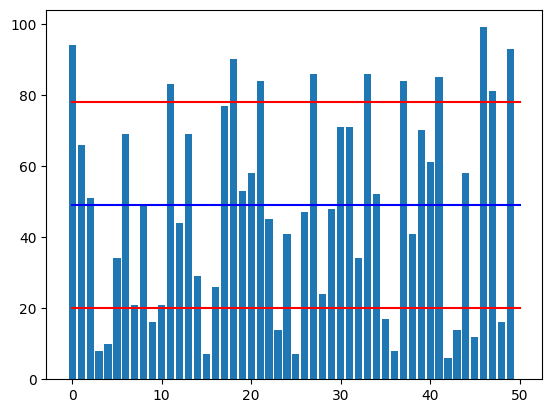

In [10]:
x_pos = range(50)
plt.bar(x_pos, val3)
plt.plot((0, 50), (49, 49), "b")
plt.plot((0, 50), (49 + 29, 49 + 29), "r")
plt.plot((0, 50), (49 - 29, 49 - 29), "r")
plt.show()

__Standard Error__

In [11]:
from scipy import stats

stats.sem(val3)

4.112797349835794

__Other measures: the z-score__

In [12]:
mean = np.mean(val3)
std = np.std(val3)
zscores = []
for val in val3:
    z = (val - mean) / std
    zscores.append(z)

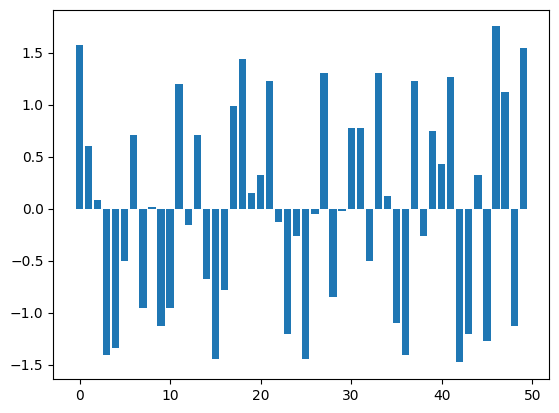

In [13]:
plt.bar(x_pos, zscores)
plt.show()

# 5. Covariance and correlation

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


X = np.random.randn(1, 50)
Y = np.random.randn(1, 50)

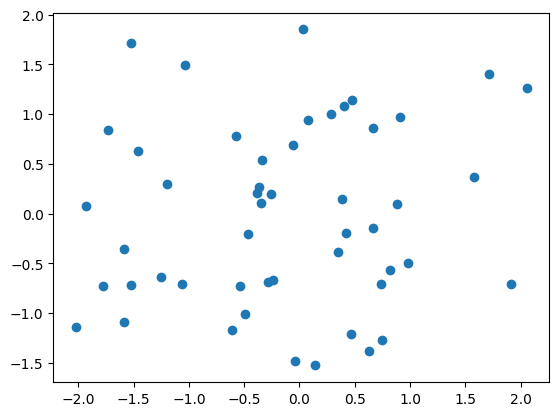

In [15]:
plt.scatter(X, Y)
plt.show()

In [16]:
np.corrcoef(X, Y)

array([[1.        , 0.11678569],
       [0.11678569, 1.        ]])

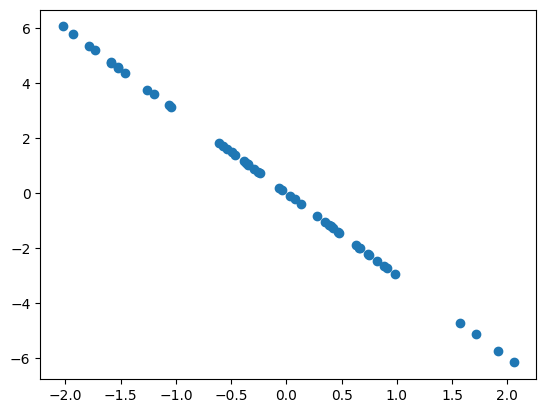

In [17]:
plt.scatter(X, -3 * X)
plt.show()

In [18]:
np.corrcoef(X,-3*X)

array([[ 1., -1.],
       [-1.,  1.]])

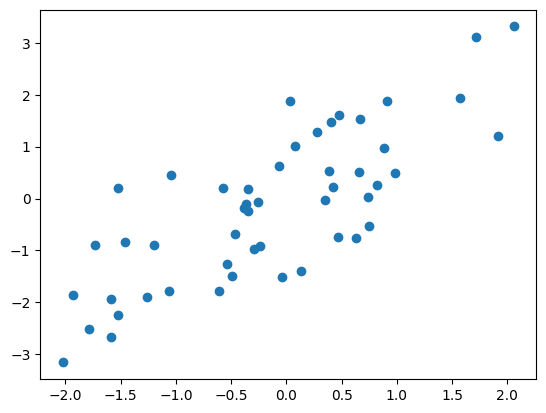

In [19]:
plt.scatter(X, X + Y)
plt.show()

In [20]:
np.corrcoef(X, X + Y)

array([[1.        , 0.78247816],
       [0.78247816, 1.        ]])

In [21]:
df = pd.DataFrame(np.random.randn(50, 2), columns=list("XY"))

In [22]:
df.head()

,X,Y
0,1.339950,-0.538494
1,1.450190,1.535055
2,1.196332,0.382914
3,-0.106469,1.093078
4,-0.396485,0.845754


In [23]:
df["X"].corr(df["Y"])

-0.029597454244608804

__Studying correlations between many random variables__

In [24]:
data = np.random.randn(10, 50)
np.corrcoef(data)

array([[ 1.        , -0.0217015 , -0.01709055, -0.23161392,  0.10088444,
        -0.23730465,  0.14121384, -0.20990482,  0.07463997, -0.20749401],
       [-0.0217015 ,  1.        , -0.09480964, -0.01274221,  0.15416845,
        -0.0354192 , -0.36151964,  0.06217375, -0.37020833,  0.0109066 ],
       [-0.01709055, -0.09480964,  1.        , -0.27270365,  0.08457305,
         0.04837327, -0.0521309 ,  0.21242924,  0.11772451,  0.21235365],
       [-0.23161392, -0.01274221, -0.27270365,  1.        ,  0.12129261,
         0.1467116 ,  0.2675595 , -0.05314462, -0.24540821,  0.01765375],
       [ 0.10088444,  0.15416845,  0.08457305,  0.12129261,  1.        ,
        -0.14245412, -0.13301012, -0.06493362, -0.27099725,  0.14551   ],
       [-0.23730465, -0.0354192 ,  0.04837327,  0.1467116 , -0.14245412,
         1.        ,  0.03611256, -0.0106608 ,  0.08631262,  0.07351522],
       [ 0.14121384, -0.36151964, -0.0521309 ,  0.2675595 , -0.13301012,
         0.03611256,  1.        ,  0.00147282

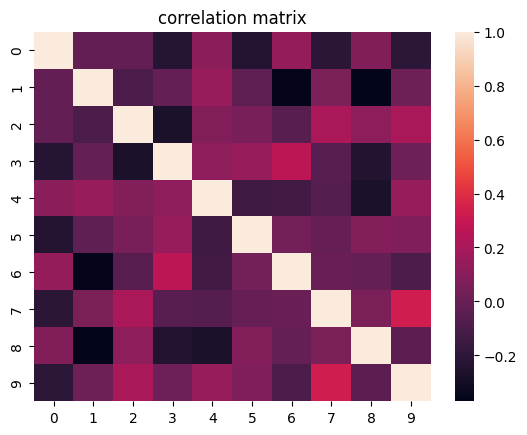

In [25]:
import seaborn as sns

sns.heatmap(np.corrcoef(data))
plt.title('correlation matrix')
plt.show()

# 6. Point estimates and confidence intervals

__Point estimates__

In [26]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import random

%matplotlib inline

Example: Our population consists of 200,000 values drawn from the Poisson distribution with mean 55 and 100,000 values drawn from the Poisson distribution with mean 10. Let’s compute the mean for this dataset

In [27]:
poisson1 = stats.poisson.rvs(mu=55, size=200000)
poisson2 = stats.poisson.rvs(mu=10, size=100000)
population = np.concatenate((poisson1, poisson2))
population.mean()

40.007886666666664

In [28]:
sample = np.random.choice(population, size=1000)
sample_mean = sample.mean()
sample_mean

40.173

__Confidence intervals__

The z-critical value represents the number of standard deviations that we would have to go from the mean of the normal distribution in order to capture the proportion of the points corresponding to our chosen confidence level.

In [29]:
z = stats.norm.ppf(q=0.975)
z

1.959963984540054

Let’s look at our previous example of Poisson random variables. Recall that we created a variable sample of 1000 values from our population and we computed a point estimate for the mean of the population based on the mean of the sample. Let’s now compute the standard deviation of our population in order to set up our confidence intervals.

In [30]:
pop_std = population.std()
pop_std

22.134943365649

In [31]:
margin_of_error = z * (pop_std / np.sqrt(1000))
margin_of_error

1.3719127938372062

In [32]:
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
confidence_interval

(38.8010872061628, 41.544912793837206)

In [33]:
population.mean()

40.007886666666664

Knowing the distribution variance beforehand

In [34]:
intervals = []
sample_means = []

for sample in range(10):
    sample = np.random.choice(population, size=1000)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)
    pop_std = population.std()
    margin_of_error = z * (pop_std / np.sqrt(1000))
    confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
    intervals.append(confidence_interval)

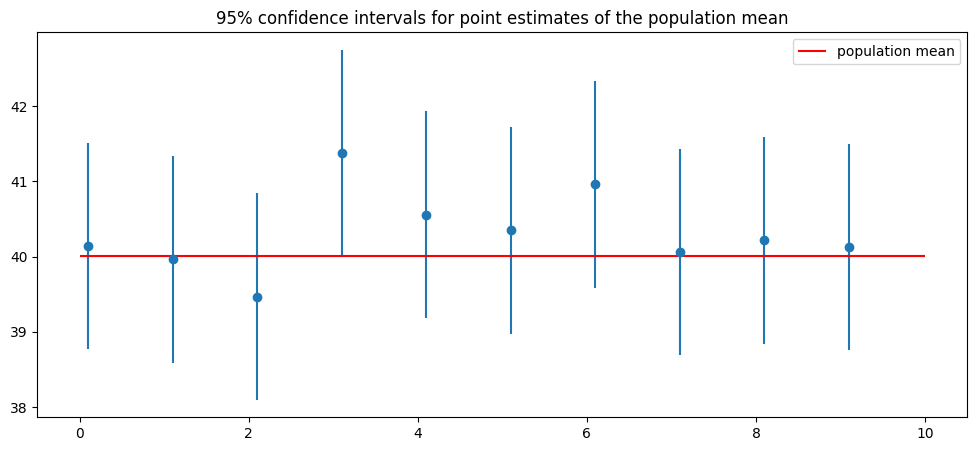

In [35]:
plt.figure(figsize=(12, 5))

plt.errorbar(
    x=np.arange(0.1, 10, 1),
    y=sample_means,
    yerr=[(top - bot) / 2 for bot, top in intervals],
    fmt="o",
)

plt.hlines(xmin=0, xmax=10, y=population.mean(), color="red", label="population mean")
plt.legend()
plt.title("95% confidence intervals for point estimates of the population mean")
plt.show()

Estimating also the variance from the sample

Let’s look at all of this through the help of our example again. We will work this time with a smaller sample to have more realistic results since normally when using this method the sample size will be much smaller than the population size.

In [44]:
sample_small = np.random.choice(population, size=10)
sample_small_mean = sample_small.mean()
sample_small_mean

49.9

In [45]:
t = stats.t.ppf(q=0.975, df=9)
t

2.2621571627409915

In [46]:
sigma = sample_small.std() / np.sqrt(10)
margin_of_error = t * sigma
confidence_interval = (
    sample_small_mean - margin_of_error,
    sample_small_mean + margin_of_error,
)
confidence_interval

(40.79808478596314, 59.001915214036856)

The higher our sample size in general the more the t-critical value will approach the z-critical value. 

In [76]:
print(f'  10 samples: {stats.t.ppf(q=0.975, df=9) - stats.norm.ppf(0.975)}')
print(f'1000 samples: {stats.t.ppf(q=0.975, df=999) - stats.norm.ppf(0.975)}')

  10 samples: 0.3021931782009375
1000 samples: 0.0023774765933946007


Use `stats.t.interval()` for computing confidence interval

In [49]:
stats.t.interval(0.95,              # Confidence level
                 df= 9,                     # Degrees of freedom
                 loc = sample_small_mean,   # Sample mean
                 scale = sigma)             # Standard deviation estimate

(40.79808478596314, 59.001915214036856)

In [73]:
for confidence in (0.5, 0.75, 0.8, 0.90, 0.95):
    confidence_interval = stats.t.interval(
        confidence, df=9, loc=sample_small_mean, scale=sigma
    )
    interval = round(confidence_interval[1] - confidence_interval[0], 2)
    print(f'CL: {confidence:.0%}, Interval: {interval:5.2f}')  # 0.95 26.43


CL: 50%, Interval:  5.65
CL: 75%, Interval:  9.90
CL: 80%, Interval: 11.13
CL: 90%, Interval: 14.75
CL: 95%, Interval: 18.20


# 7. Hypothesis testing

The whole process of hypothesis testing can be summed up via the steps below:

- Formulate the null hypothesis (denoted by H0) and the alternative hypothesis (denoted by H1)
- Determine the sample size for your sample
- Choose a significance level (this is denoted by α and a common value is 0.05)
- Collect your sample
- Decide whether to accept or reject the null hypothesis

The test statistic is usually examined together with something called the p-value which basically tells us the probability that the observed statistic occurred this way by chance

In [77]:
poisson1 = stats.poisson.rvs(mu=55, size=200000)
poisson2 = stats.poisson.rvs(mu=10, size=100000)
population = np.concatenate((poisson1, poisson2))

__One-sample t-tests__

In [82]:
test_sample = np.concatenate(
    (stats.poisson.rvs(mu=50, size=200), stats.poisson.rvs(mu=10, size=100))
)

$H_0$ = the dataset test_sample has the same mean as the dataset population

In [83]:
t_statistic, p_value = stats.ttest_1samp(test_sample, popmean=population.mean())
print(f't-statistic: {t_statistic}\np-value:     {p_value}')

t-statistic: -2.7904481453714993
p-value:     0.0056018360486770665


The t_statistic is a standardized metric that tells us how much the sample mean deviates from the null hypothesis. The p_value means that 0.49 percent of the time our data just randomly happened to appear this way. This is quite a small percentage in this case. But our decision on whether to reject or accept the hypothesis is based solely on the p_value in this case. The rule is the following

- if the p-value is less than the significance value we reject the null hypothesis
- if the p-value is greater than the significance value we failed to reject the null hypothesis

In our case a p-value of 0.0049 is certainly less than our significance value of 0.05 therefore we can reject our hypothesis. Of course, since we created this example we knew from the start that our test_sample had indeed a difference mean, but the hypothesis test confirmed this for us.

__Type I and II errors__

- A type I error occurs if we reject the null hypothesis when it is actually true (this is also called a false positive).
- A type II error occurs if we fail to reject the null hypothesis when it is actually false (this is known as a false negative).


__Chi-square tests__

Another branch of statistical tests are based on the Chi-square distribution. In the following we describe two of such tests, namely Chi-square goodness of fit test and Chi-square test of independence which are useful when we are dealing with qualitative, or categorical data. 

In [84]:
data = pd.DataFrame(
    ["red"] * 50000 + ["blue"] * 30000 + ["green"] * 10000 + ["white"] * 10000
)
sample = pd.DataFrame(["red"] * 600 + ["blue"] * 300 + ["green"] * 70 + ["white"] * 60)

We will now test the null hypothesis that the sample has the same distribution as the population.

We begin by first establishing the distribution in each of the two datasets.

In [85]:
data_count = pd.crosstab(index=data[0], columns="count")
data_count

col_0,count
0,
blue,30000
green,10000
red,50000
white,10000


In [86]:
sample_count = pd.crosstab(index=sample[0], columns="count")
sample_count

col_0,count
0,
blue,300
green,70
red,600
white,60


Now we must calculate the chi-square statistic which is given by the following formula:  
$\sum\frac{(observed−expected)^2}{expected}$

In [88]:
expected_count = data_count * len(sample) / len(data)
expected_count

col_0,count
0,
blue,309.0
green,103.0
red,515.0
white,103.0


Computation of chi-square statistics

In [89]:
chi_square = (((sample_count - expected_count) ** 2) / expected_count).sum()
chi_square

col_0
count    42.815534
dtype: float64

We choose a significance level,again of 0.05, and then compute the critical value corresponding to this confidence.

In [97]:
print(f'Critical value: {stats.chi2.ppf(q=0.95, df=3)}')
print(f'       p-value: {1 - stats.chi2.cdf(x=chi_square, df=3)}')

Critical value: 7.814727903251179
       p-value: [2.69324241e-09]


Instead of a manual calculation we can also use the `stats.chisquare` function directly

In [98]:
chi_square, p_value = stats.chisquare(sample_count,expected_count)

print(chi_square,p_value)

[42.81553398] [2.69324239e-09]


In the Chi-square test of independence the objective is to test whether two categorical variables are independent or not. Let’s set up an example of a population with two categorical variables and test the null hypothesis that they are independent. Suppose that the following data shows two types of chocolate (A and B) that are packaged in four colors (red, blue, green and white).

In [99]:
data = pd.DataFrame(
    ["red"] * 50000 + ["blue"] * 30000 + ["green"] * 10000 + ["white"] * 10000, 
    columns=['color']
)
data['type'] = data.groupby('color')['color'].transform(lambda x: np.random.choice(["A",'B'], size=len(x)))
data 

,color,type
0,red,A
1,red,B
2,red,B
3,red,A
4,red,A
...,...,...
99995,white,B
99996,white,B
99997,white,B
99998,white,A


In [100]:
pd.crosstab(data.color, data.type, margins=True)

type,A,B,All
color,,,
blue,15071,14929,30000
green,5010,4990,10000
red,25102,24898,50000
white,4942,5058,10000
All,50125,49875,100000


Now suppose that we have access to this population only via a small sample from it. We are interested to know whether the chocolate types and colors are related to each other or not. Let’s begin the test by taking random sample of 1000 chocolates and represent them through a contingency table.

In [103]:
sample = data.sample(n=1000)

pd.crosstab(sample.color, sample.type, margins=True)

type,A,B,All
color,,,
blue,158,152,310
green,49,55,104
red,241,232,473
white,53,60,113
All,501,499,1000


In [104]:
chi_square, p_value, dof, matrix = stats.chi2_contingency(pd.crosstab(sample.color, sample.type))

print(chi_square,p_value)

1.0631628069410768 0.785973331883697


# 8. Exercise: hypothesis testing

In [105]:
poisson1 = stats.poisson.rvs(mu=55, size=200000)
poisson2 = stats.poisson.rvs(mu=10, size=100000)
population = np.concatenate((poisson1, poisson2))

In [124]:
test_sample = np.random.choice(population, 300, replace=False)

$H_0$ = the dataset test_sample has the same mean as the dataset population

In [125]:
t_statistic, p_value = stats.ttest_1samp(test_sample, popmean=population.mean())
print(f't-statistic: {t_statistic}\np-value:     {p_value}')

t-statistic: 1.625008494853557
p-value:     0.10521433243377107


In [143]:
data = pd.DataFrame(
    ["red"] * 50000 + ["blue"] * 30000 + ["green"] * 10000 + ["white"] * 10000
)
data_count = pd.crosstab(index=data[0], columns="count")
data_count

col_0,count
0,
blue,30000
green,10000
red,50000
white,10000


In [145]:
sample = data.sample(300, replace=False)
sample_count = pd.crosstab(index=sample[0], columns="count")
sample_count

col_0,count
0,
blue,84
green,24
red,156
white,36


In [149]:
expected_count = data_count * len(sample) / len(data)
expected_count

col_0,count
0,
blue,90.0
green,30.0
red,150.0
white,30.0


In [150]:
chi_square, p_value = stats.chisquare(sample_count,expected_count)
print(chi_square,p_value)

[3.04] [0.38549899]


# 9. AB Testing

The chi-square test we looked at in the previous unit can also be used to test for independence between two categorical variables. We already defined the concept of independent random variables in our subject on probability. Here we will look at an example concerning A/B testing which is a very important tool in statistical analysis. Now, the topic of A/B testing is extremely complex and there are entire courses dedicated to it. Here we aim to just give you a taste of what A/B testing can be used for.

A very common application of this method is the following scenario: suppose you work for a company that receives online traffic through ads. The design team has come up with 2 versions of the ad (which we will call A and B) and it is your job as the data scientist to determine which ad is better. You decide to set up an online experiment where internet users are directed randomly to one of the two ads. After a week you collect the data on each ad: how many users saw it and how many of these users actually clicked on it.